In [2]:
from fbprophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import sys
from yahoo_finance_api2 import share
from yahoo_finance_api2.exceptions import YahooFinanceError

bitcoin_aud = share.Share('BTC-AUD')
bitcoin_data = bitcoin_aud.get_historical(
    share.PERIOD_TYPE_DAY, 10,
    share.FREQUENCY_TYPE_MINUTE, 5)

In [18]:
# df = pd.DataFrame(bitcoin_data)
# df.head()
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms')
bitcoin_data.keys()

dict_keys(['timestamp', 'open', 'high', 'low', 'close', 'volume'])

In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'],unit='ms')
(df.set_index("timestamp")
   .resample('D')
   .mean()
)

,open,high,low,close,volume
timestamp,,,,,
2019-10-03,12238.642108,12246.265952,12230.338646,12238.721661,9247.834906
2019-10-04,12092.305003,12101.101415,12084.350027,12092.907741,10514.178947
2019-10-05,11998.620188,12007.116235,11990.260461,11999.093106,7930.958333
2019-10-06,11822.651744,11829.968933,11814.034912,11821.186595,10142.454861
2019-10-07,11952.140303,11962.554606,11944.009115,11954.160831,14066.281250
2019-10-08,12214.788476,12223.059146,12206.636943,12215.265852,12481.413194
2019-10-09,12383.564602,12393.426415,12374.563639,12385.016435,14149.680556
2019-10-10,12704.373064,12712.082031,12696.538414,12704.280045,11249.181818
2019-10-11,12423.530205,12431.375330,12413.424705,12421.953345,12439.570423


In [9]:
data = df.rename(columns={'timestamp': 'ds', 'open': 'y'})

In [12]:
m = Prophet( yearly_seasonality=False, weekly_seasonality=False)
m.fit(data[['ds','y']])

In [13]:
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2865,2019-10-13 04:40:00,12337.953059,12252.397042,12414.043422
2866,2019-10-13 04:45:00,12337.801864,12253.175487,12423.486167
2867,2019-10-13 04:50:00,12337.554836,12256.970280,12424.527386
2868,2019-10-13 04:55:00,12337.209119,12259.619184,12414.503114
2869,2019-10-14 04:55:00,12272.238512,11510.115052,12973.692435


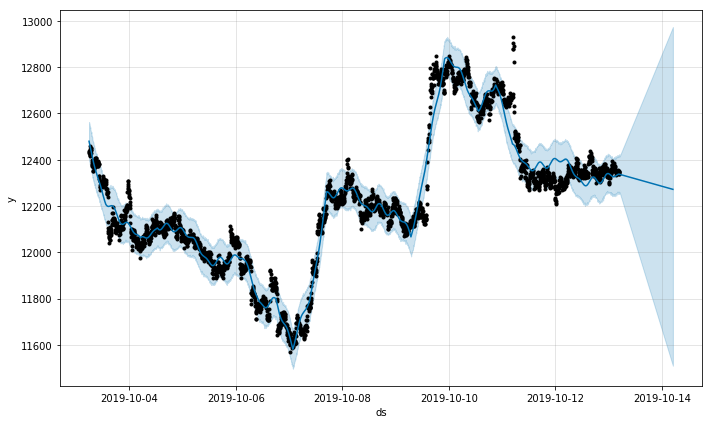

In [14]:
fig1 = m.plot(forecast)
plt.show()

In [ ]:
# import panda, keras and tensorflow
import pandas as pd
import tensorflow as tf
import keras
from keras import models, layers
# Load the sample data set and split into x and y data frames 
df = pd.read_csv("game.csv")
x = df.drop(['label'], axis=1)
y = df['label']
# Define the keras model
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10,)))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Use a custom metricfunction
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    keras.backend.get_session().run(tf.local_variables_initializer())
    return auc    
# Compile and fit the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
              metrics=[auc])
history = model.fit(x, y, epochs=100, batch_size=100,
                    validation_split = .2, verbose=0)
# Save the model in h5 format 
model.save("games.h5")

In [15]:
!curl -0 https://raw.githubusercontent.com/bgweber/Twitch/master/Recommendations/games-expand.csv

In [3]:
!ls

Trade-Bot.ipynb game.csv
